# tensorflow 재설치. 
실행 후 런타임 재시작 한번 하시면 됩니다.

In [1]:
# !pip uninstall tensorflow
# !pip install tensorflow==1.14.0

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
tf.__version__

'1.14.0'

In [34]:
def graph(w_number, x_number, step_number):
    %%time
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_normal([x_number]), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_number + 1):
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
0 Cost:  20590.537 

w1:  [array([-0.49528152], dtype=float32)] w2:  [array([-0.14437383], dtype=float32)] w3:  [array([-0.21956494], dtype=float32)] w4:  [array([0.96004486], dtype=float32)] w5:  [array([1.9523621], dtype=float32)] w6:  [array([-0.9444495], dtype=float32)] 

6000 Cost:  3.165199 

w1:  [array([-0.355094], dtype=float32)] w2:  [array([-0.2381458], dtype=float32)] w3:  [array([-0.58024645], dtype=float32)] w4:  [array([0.64963216], dtype=float32)] w5:  [array([0.41869664], dtype=float32)] w6:  [array([-0.16946904], dtype=float32)] 

12000 Cost:  1.6665174 

w1:  [array([-0.2207138], dtype=float32)] w2:  [array([-0.32657036], dtype=float32)] w3:  [array([-0.54730535], dtype=float32)] w4:  [array([0.4556358], dtype=float32)] w5:  [array([0.32621184], dtype=float32)] w6:  [array([-0.12747604], dtype=float32)] 

18000 Cost:  1.2184246 

w1:  [array([-0.11450641], dtype=float32)] w2:  [array([-0.3676853], dtype=

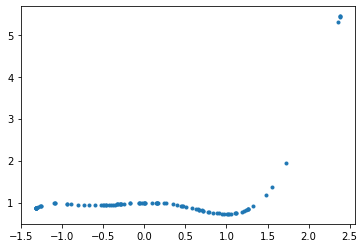

In [35]:
graph(6, 100, 30000)

0 Cost:  1674.1755 

w1:  [array([0.22503605], dtype=float32)] w2:  [array([-0.29615358], dtype=float32)] w3:  [array([0.4226972], dtype=float32)] w4:  [array([-0.33600375], dtype=float32)] w5:  [array([0.47519094], dtype=float32)] w6:  [array([-0.09891133], dtype=float32)] 

6000 Cost:  0.36330044 

w1:  [array([0.19052328], dtype=float32)] w2:  [array([-0.13934608], dtype=float32)] w3:  [array([0.21961175], dtype=float32)] w4:  [array([0.10837085], dtype=float32)] w5:  [array([-0.00412909], dtype=float32)] w6:  [array([-0.00372566], dtype=float32)] 

12000 Cost:  0.3304314 

w1:  [array([0.22183777], dtype=float32)] w2:  [array([-0.11581508], dtype=float32)] w3:  [array([0.20155239], dtype=float32)] w4:  [array([0.10962896], dtype=float32)] w5:  [array([-0.00163829], dtype=float32)] w6:  [array([-0.00398772], dtype=float32)] 

18000 Cost:  0.30439955 

w1:  [array([0.2540354], dtype=float32)] w2:  [array([-0.09598428], dtype=float32)] w3:  [array([0.19178708], dtype=float32)] w4:  [a

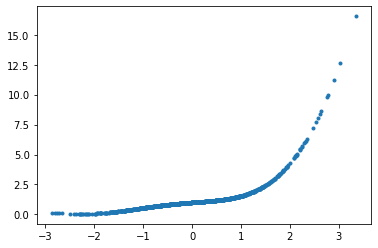

In [ ]:
graph(6, 1000, 30000)

0 Cost:  16542.277 

w1:  [array([-0.17550696], dtype=float32)] w2:  [array([-0.5823108], dtype=float32)] w3:  [array([0.5545456], dtype=float32)] w4:  [array([0.32682055], dtype=float32)] w5:  [array([-0.38329548], dtype=float32)] w6:  [array([0.40438274], dtype=float32)] 

6000 Cost:  1.0762184 

w1:  [array([-0.17120807], dtype=float32)] w2:  [array([-0.5098731], dtype=float32)] w3:  [array([0.40481502], dtype=float32)] w4:  [array([0.21737936], dtype=float32)] w5:  [array([-0.02148394], dtype=float32)] w6:  [array([-0.01062955], dtype=float32)] 

12000 Cost:  0.8266081 

w1:  [array([-0.14569058], dtype=float32)] w2:  [array([-0.45367083], dtype=float32)] w3:  [array([0.310754], dtype=float32)] w4:  [array([0.17464685], dtype=float32)] w5:  [array([-0.01525361], dtype=float32)] w6:  [array([-0.00818765], dtype=float32)] 

18000 Cost:  0.7159659 

w1:  [array([-0.11038312], dtype=float32)] w2:  [array([-0.40935737], dtype=float32)] w3:  [array([0.25881326], dtype=float32)] w4:  [arr

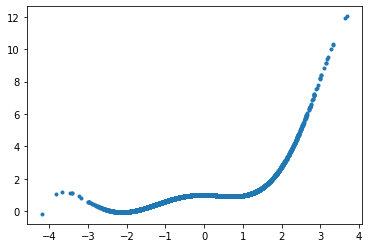

In [ ]:
graph(6, 10000, 30000)

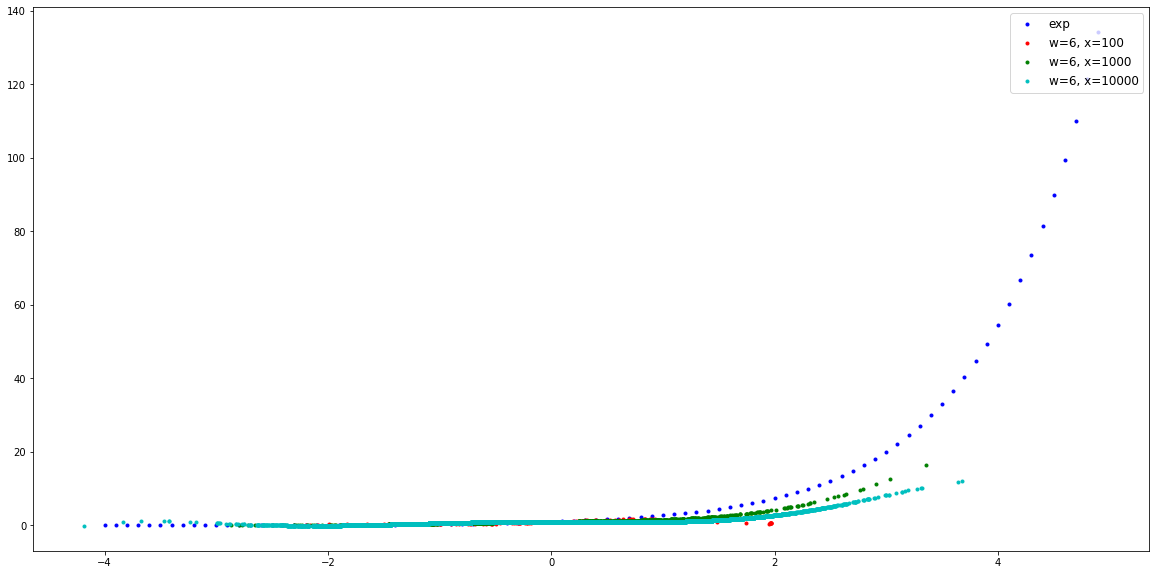

In [ ]:
x = np.array([i for i in range(-40, 50, 1)])
plt.figure(figsize = (20, 10))
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.legend(loc = 'upper right', fontsize = 'large')

plt.show()

# 2021-06-21 추가 수정

In [4]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline

nx = 10
dx = 1. / nx

def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1. # IC

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx
  
# plt.figure()
# plt.plot(x_space, y_space) 
# plt.plot(x_space, psy_fd)
# plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print loss_function(W, x_space)

# print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

# print(W)

# plt.figure()
# plt.plot(x_space, y_space) 
# plt.plot(x_space, psy_fd)
# plt.plot(x_space, res)
# plt.show()

In [ ]:
def graph(w_number, x_number, step_number):
    %%time
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_normal([x_number]), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_number + 1):
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

In [40]:
def graph_N(w_number, x_number, step_number):
  y = 1
  yprime = 0
  x = tf.Variable(tf.random_normal([x_number]), name = 'x')

  for i in range(1, w_number + 1):
    globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
    y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
    # y += neural_network(W, x)[0][0]
    yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    yprime += d_neural_network_dx(W, 1)
  cost = tf.reduce_mean(tf.square(yprime - y))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  for step in range(step_number + 1):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
    if step % int(step_number / 5) == 0:
  #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
        print(step, "Cost: ", cost_val, "\n")
        print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
        
  def y(x):
    answer = 1
    for i in range(1, w_number + 1):
        answer += globals()['w{}_val'.format(i)]*(x**i)
    return answer[0]

  globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
  plt.plot(x_val, y(x_val), '.')
  plt.show()

In [31]:
w_number, x_number, step_number = 6, 100, 30000
y = 1
yprime = 0
x = tf.Variable(tf.random_normal([x_number]), name = 'x')
# x_space = np.linspace(0, 1, nx)
# [neural_network(W, xi)[0][0] for xi in x_space] 

In [55]:
w_number, x_number, step_number = 6, 100, 30000
y = 1
yprime = 0
x = tf.Variable(tf.random_normal([x_number], seed = 7), name = 'x')
xi = tf.random_normal([x_number], seed = 7)

for i in range(1, w_number + 1):
  globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
  y += neural_network(W, 0.1)[0][0]
  yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
  # yprime += d_neural_network_dx(W, 1)
cost = tf.reduce_mean(tf.square(yprime - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# for step in range(step_number + 1):
#   for i in range(1, w_number + 1):
#       globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
#   cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
#   if step % int(step_number / 5) == 0:
# #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
#       print(step, "Cost: ", cost_val, "\n")
#       print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
      
# def y(x):
#   answer = 1
#   for i in range(1, w_number + 1):
#       answer += globals()['w{}_val'.format(i)]*(x**i)
#   return answer[0]

# globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
# plt.plot(x_val, y(x_val), '.')
# plt.show()

0 Cost:  13450.183 

w1:  [array([1.293387], dtype=float32)] w2:  [array([0.10165562], dtype=float32)] w3:  [array([0.41230524], dtype=float32)] w4:  [array([0.04083968], dtype=float32)] w5:  [array([-2.0635266], dtype=float32)] w6:  [array([-0.78854465], dtype=float32)] 

6000 Cost:  24.406519 

w1:  [array([0.7289162], dtype=float32)] w2:  [array([0.33656108], dtype=float32)] w3:  [array([0.2261066], dtype=float32)] w4:  [array([0.19219731], dtype=float32)] w5:  [array([-0.9790135], dtype=float32)] w6:  [array([-0.43826088], dtype=float32)] 

12000 Cost:  18.609327 

w1:  [array([0.31121984], dtype=float32)] w2:  [array([0.44900557], dtype=float32)] w3:  [array([0.01856664], dtype=float32)] w4:  [array([0.18202041], dtype=float32)] w5:  [array([-0.9751548], dtype=float32)] w6:  [array([-0.48576233], dtype=float32)] 

18000 Cost:  15.108413 

w1:  [array([-0.02523027], dtype=float32)] w2:  [array([0.50382483], dtype=float32)] w3:  [array([-0.11426352], dtype=float32)] w4:  [array([0.1

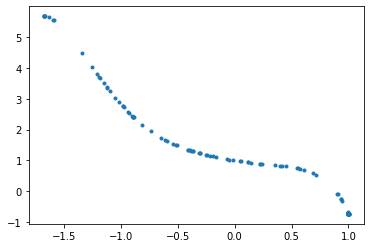

0 Cost:  4824.3584 

w1:  [array([-0.6633776], dtype=float32)] w2:  [array([-0.01175488], dtype=float32)] w3:  [array([3.1886625], dtype=float32)] w4:  [array([0.5900314], dtype=float32)] w5:  [array([1.6464615], dtype=float32)] w6:  [array([0.37505236], dtype=float32)] 

6000 Cost:  39.675594 

w1:  [array([-1.3513299], dtype=float32)] w2:  [array([0.34151784], dtype=float32)] w3:  [array([1.334134], dtype=float32)] w4:  [array([0.37915063], dtype=float32)] w5:  [array([-0.16952159], dtype=float32)] w6:  [array([-0.04470785], dtype=float32)] 

12000 Cost:  20.977152 

w1:  [array([-1.7847126], dtype=float32)] w2:  [array([0.39778367], dtype=float32)] w3:  [array([0.490537], dtype=float32)] w4:  [array([-0.00073201], dtype=float32)] w5:  [array([-0.11356431], dtype=float32)] w6:  [array([-0.02179909], dtype=float32)] 

18000 Cost:  13.354324 

w1:  [array([-2.1004066], dtype=float32)] w2:  [array([0.37734386], dtype=float32)] w3:  [array([-0.04866066], dtype=float32)] w4:  [array([-0.2

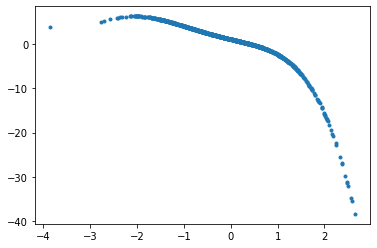

0 Cost:  19916.188 

w1:  [array([-1.7793304], dtype=float32)] w2:  [array([-0.26734802], dtype=float32)] w3:  [array([0.39394024], dtype=float32)] w4:  [array([-0.19300933], dtype=float32)] w5:  [array([-0.6452084], dtype=float32)] w6:  [array([0.6596733], dtype=float32)] 

6000 Cost:  11.052685 

w1:  [array([-2.1612287], dtype=float32)] w2:  [array([-0.14291608], dtype=float32)] w3:  [array([-0.3162494], dtype=float32)] w4:  [array([-0.23768908], dtype=float32)] w5:  [array([-0.05275263], dtype=float32)] w6:  [array([-0.00228784], dtype=float32)] 

12000 Cost:  8.032146 

w1:  [array([-2.4053962], dtype=float32)] w2:  [array([-0.16644679], dtype=float32)] w3:  [array([-0.62870413], dtype=float32)] w4:  [array([-0.3691309], dtype=float32)] w5:  [array([-0.0389194], dtype=float32)] w6:  [array([0.00422818], dtype=float32)] 

18000 Cost:  6.880058 

w1:  [array([-2.5992143], dtype=float32)] w2:  [array([-0.227327], dtype=float32)] w3:  [array([-0.7771994], dtype=float32)] w4:  [array([

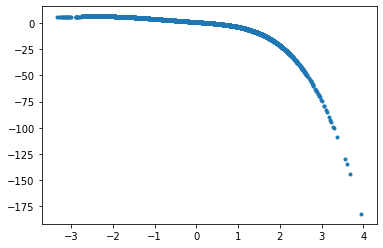

In [41]:
graph_N(6, 100, 30000)
graph_N(6, 1000, 30000)
graph_N(6, 10000, 30000)

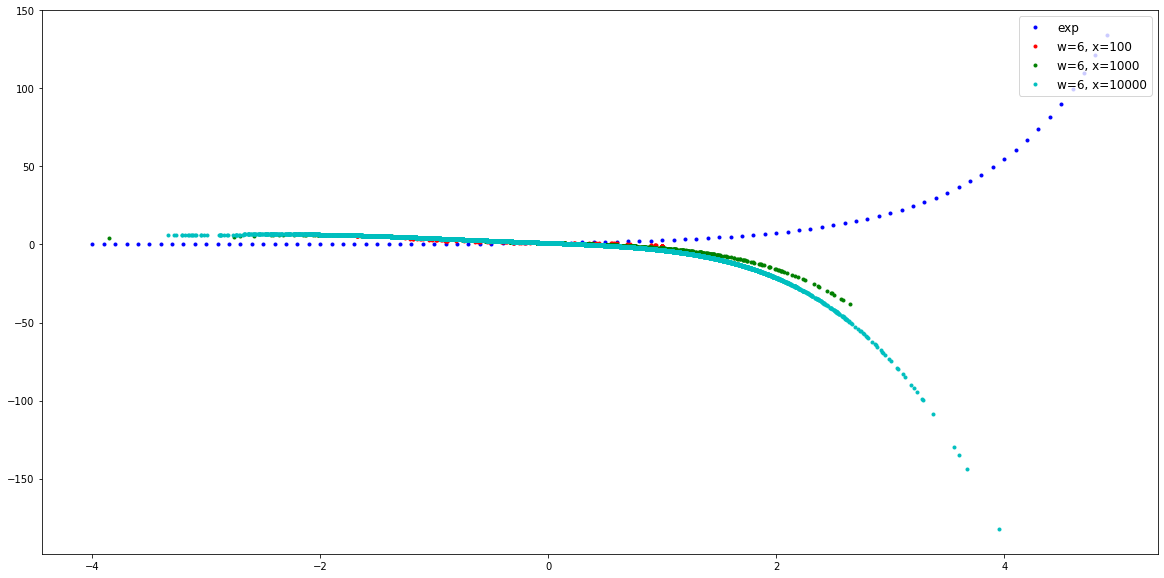

In [42]:
x = np.array([i for i in range(-40, 50, 1)])
plt.figure(figsize = (20, 10))
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.legend(loc = 'upper right', fontsize = 'large')

plt.show()

In [ ]:
x

array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
       -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
       -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49])

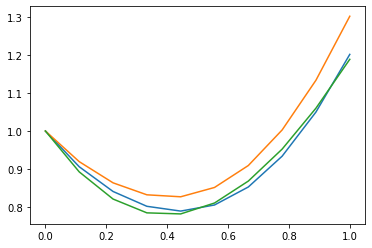

In [ ]:
x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1. # IC

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx

W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print loss_function(W, x_space)

# print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

# print(W)

plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.plot(x_space, res)
plt.show()